In [1]:
import pandas as pd
import numpy as np

In [2]:
#read csv file

df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv', parse_dates = True)

#display shape
df.shape

(450, 26)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,04/02/2008,136578.20,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,1238.0,NaN,NaN,01/05/2015,302959.40,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25.0,NaN,NaN,02/03/2020,2159.67,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,2699.0,NaN,NaN,06/30/2017,922407.32,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [4]:
df.shape

(450, 26)

# 4.1) How many different companies are represented in the data set?

In [5]:
df['Company Name'].nunique()

439

# 4.2) What is the total number of jobs created for businesses in Queens?

In [6]:
# All Companies in Queens

companies_in_queens = df.loc[df['City'].str.contains('queens', case= False), ['Company Name', 'City', 'Job created']]
companies_in_queens.head()

,Company Name,City,Job created
15,538-540 West 35 Corp,Queens,NaN
19,A & L Scientific Corp.,Queens,NaN
20,"A.K.S. International, Inc",Queens,NaN
37,ALLE PROCESSING CORP.,Queens,60.0
45,"American Torque, Inc.",Queens,NaN


In [7]:
#total jobs created for all businesses in Queens

companies_in_queens['Job created'].sum()

90.0

# 4.3) How many different unique email domain names are there in the data set?

In [11]:
# extract email domain names from company email

df['email_domain'] = df['company email'].str.split('@').str[1]


# count the unique domain names

df['email_domain'].nunique()

356

# 4.4) Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [9]:
# Create DateFrame for NTAs with at least 5 listed businesses

df_NTA = df.groupby('NTA').filter(lambda x: len(x) >= 5)


In [12]:
#find the mean of total savings by NTA

mean_savings_by_NTA = df_NTA.groupby('NTA')['Total Savings'].mean()

mean_savings_by_NTA.sort_values(ascending = False)

NTA
Battery Park City-Lower Manhattan                   469890.796667
Queensbridge-Ravenswood-Long Island City             61830.770625
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     59950.340000
East New York                                        48433.093333
Hunts Point                                          39246.016154
SoHo-TriBeCa-Civic Center-Little Italy               37214.024000
Bushwick South                                       26140.455000
Carroll Gardens-Columbia Street-Red Hook             24337.390000
Hunters Point-Sunnyside-West Maspeth                 23931.398933
Mott Haven-Port Morris                               17843.937857
Springfield Gardens South-Brookville                 17757.662000
College Point                                        17159.372857
park-cemetery-etc-Brooklyn                           14327.419333
Sunset Park West                                     14316.976875
East Williamsburg                                    13990.626364
Steinw

In [13]:
# find the sum of total jobs created for each NTA

total_jobs_by_NTA = df_NTA.groupby('NTA')['Job created'].sum()

total_jobs_by_NTA.sort_values(ascending = False)

NTA
Steinway                                            20.0
East New York                                       15.0
Hunts Point                                         12.0
Maspeth                                             10.0
Mott Haven-Port Morris                              10.0
Bushwick South                                      10.0
College Point                                        2.0
Sunset Park West                                     0.0
Springfield Gardens South-Brookville                 0.0
SoHo-TriBeCa-Civic Center-Little Italy               0.0
Queensbridge-Ravenswood-Long Island City             0.0
Battery Park City-Lower Manhattan                    0.0
Manhattanville                                       0.0
Hunters Point-Sunnyside-West Maspeth                 0.0
Greenpoint                                           0.0
East Williamsburg                                    0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     0.0
Crown Heights North        

# 4.5) Save your result for the previous question as a CSV file.

In [14]:
# combining the above two series into a final dataframe

df_final = pd.concat([mean_savings_by_NTA, total_jobs_by_NTA], axis = 1 )

# rename columns with the approproiate names

df_final = df_final.rename(columns = {'Total Savings': 'Avg Total Savings', 'Job created': 'Total Jobs Created'})
df_final

,Avg Total Savings,Total Jobs Created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,0.0
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
College Point,17159.372857,2.0
Crown Heights North,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
East New York,48433.093333,15.0
East Williamsburg,13990.626364,0.0
Greenpoint,9753.649286,0.0


In [15]:
# write df_final to results.csv

df_final.to_csv('results.csv')

# 5.1) Scatter plot of jobs created versus average savings (standard scale)

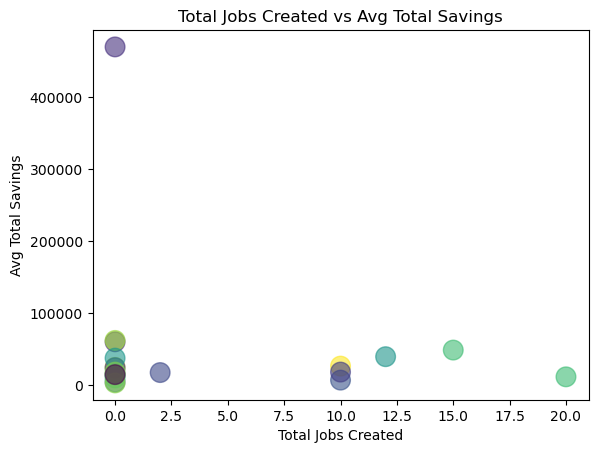

In [16]:
import matplotlib.pyplot as plt


#create arrays for jobs created and avg savings

jobs_arr = df_final['Total Jobs Created'].to_numpy()
avgSavings_arr = df_final['Avg Total Savings'].to_numpy()

color_arr =  np.random.rand(20)
plt.xlabel('Total Jobs Created')
plt.ylabel('Avg Total Savings')
plt.title('Total Jobs Created vs Avg Total Savings')

plt.scatter(jobs_arr, avgSavings_arr, s= 200, c = color_arr, alpha=0.6 )

#plt.scatter?

# 5.2) Scatter plot of jobs created versus average savings (log scale)

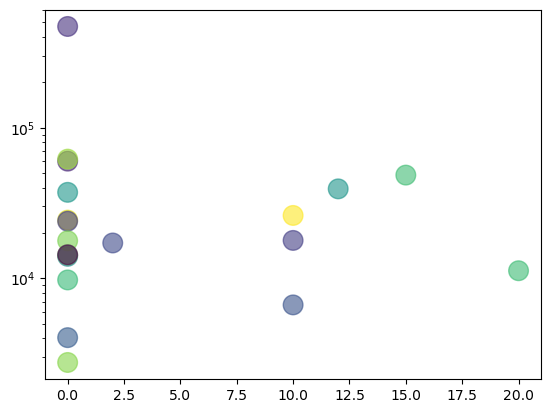

In [136]:
plt.scatter(jobs_arr, avgSavings_arr, s= 200, c = color_arr, alpha=0.6)
plt.yscale('log')

# 5.3) Histogram of the log of the average total savings.

Text(0.5, 1.0, 'Histogram of Log of Total Savings')

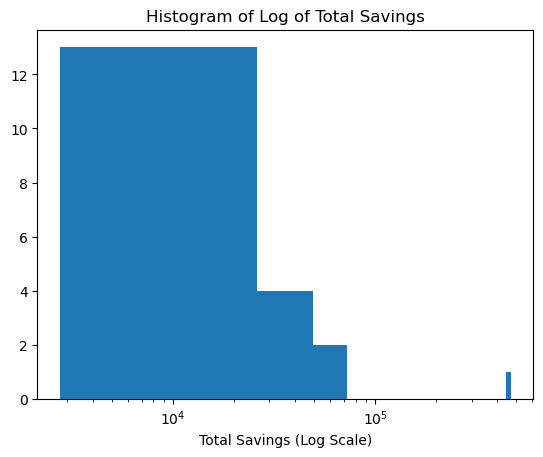

In [18]:
#bin size - square root of numbers of rows
#bins = int(np.sqrt(len(total_savings_arr)))

plt.hist(avgSavings_arr, bins=len(avgSavings_arr), density=False, stacked=True)
plt.xscale('log')
plt.xlabel('Total Savings (Log Scale)')
plt.title('Histogram of Log of Total Savings')
#plt.xlim(0, pow(10, 5))

# 5.4) Line plot of total jobs created each month

In [129]:
# filter dataframe for records where job created value exists

jobsCreated = df.loc[df['Job created'].notna(), ['Effective Date', 'Job created']]

#sort values by dates for plotting
jobsCreated['Effective Date'] = pd.to_datetime(jobsCreated['Effective Date'])
jobsCreated = jobsCreated.sort_values(by=['Effective Date'])

# truncate dates to month level
jobsCreated['YYYY-MM'] = jobsCreated['Effective Date'].dt.to_period('M').dt.to_timestamp()

jobsCreated


,Effective Date,Job created,YYYY-MM
414,1993-02-05,15.0,1993-02-01
29,2004-03-05,10.0,2004-03-01
120,2005-02-03,12.0,2005-02-01
137,2006-03-01,10.0,2006-03-01
353,2007-04-10,2.0,2007-04-01
325,2007-05-02,2.0,2007-05-01
432,2007-06-08,3.0,2007-06-01
37,2007-06-28,60.0,2007-06-01
433,2007-07-02,20.0,2007-07-01
95,2007-11-06,5.0,2007-11-01


Text(0, 0.5, 'Jobs Created')

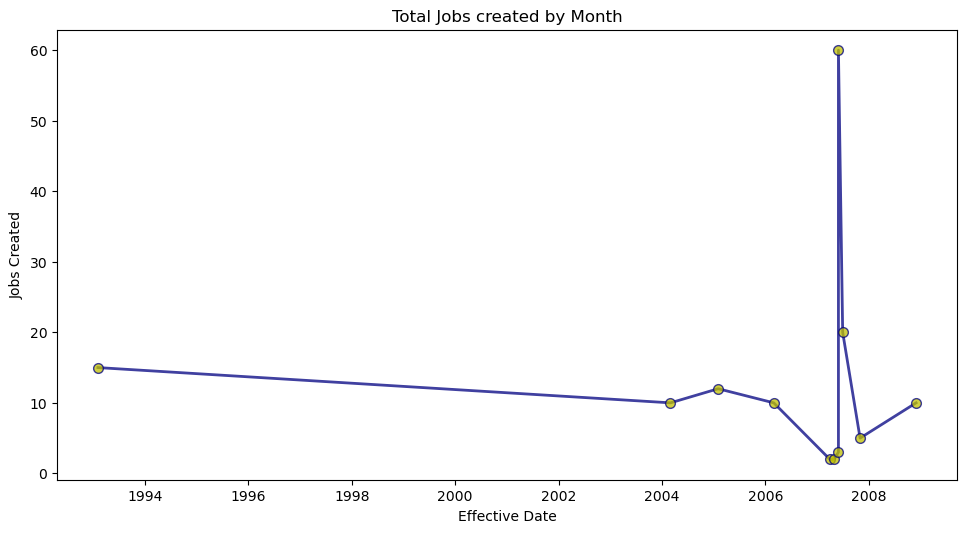

In [135]:
#plottig the graph

fig1 = plt.figure(figsize = (10,5))
axes1 = fig1.add_axes([0.1, 0.1, 0.9, 0.9])

axes1.plot(jobsCreated['YYYY-MM'], jobsCreated['Job created'], color = 'navy', alpha = 0.75, lw = 2, marker = 'o', markersize = 7,
        markerfacecolor = 'y')

axes1.set_title('Total Jobs created by Month')
axes1.set_xlabel('Effective Date')
axes1.set_ylabel('Jobs Created')

